In [15]:
import os
import os.path as path
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.models import load_model

In [16]:
current_dir = os.path.join(os.getcwd())
file = os.path.join(path.dirname(path.dirname(current_dir)), "generate_data\data_cwa.csv")
myData = pd.read_csv(file, delimiter=',', usecols=['cwa','credit','time','difficulty', 'score'])
my_data_copy = myData
myData.shape

(180346, 5)

In [17]:
myData["score"] = myData["score"].values / 100
myData["cwa"] = myData["cwa"].values / 100
myData["credit"] = myData["credit"].values / 6
myData ["difficulty"] = myData['difficulty'].values / 5
myData["time"] = myData["time"].values / 6

In [18]:
df = pd.DataFrame(myData)
df = df.sample(frac=1)

myData = df

In [19]:
targets = myData[['time']].values
myData.drop(('time'), axis=1, inplace=True)
data = myData.values

print(targets.shape)
print(data.shape)

(180346, 1)
(180346, 4)


In [20]:
# num_train = int(0.5 * len(data)) 
# num_val = int(0.25 * len(data))
# num_test = int(0.25 * len(data))

In [21]:
# train_data = data[0 : num_train]
# test_data = data[num_train: num_train + num_test]
# val_data = data[num_train + num_test:]

# train_targets = targets[0 : num_train]
# test_targets = targets[num_train: num_train + num_test]
# val_targets = targets[num_train + num_test:]

train_data = data[0 : 2000]
test_data = data[2000: 3000]
val_data = data[3000:4000]

train_targets = targets[0 : 2000]
test_targets = targets[2000: 3000]
val_targets = targets[3000 :4000]

print(len(train_data) + len(test_data) + len(val_data))
print(len(train_targets) + len(test_targets) + len(val_targets))

4000
4000


In [22]:
model = models.Sequential()
model.add(layers.Dense(128, activation="relu", input_shape=(train_data.shape[1],)))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation="relu"))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation="relu"))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               640       
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 33,793
Trainable params: 33,793
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=2e-4),
    loss="mse",
    metrics=['mae']
    )

In [24]:
history = model.fit(train_data,
                    train_targets,
                    epochs=50,
                    batch_size=100,
                    validation_data=(val_data, val_targets)
                    )

Epoch 1/50
20/20 [==============================] - 1s 7ms/step - loss: 0.0386 - mae: 0.1451 - val_loss: 0.0153 - val_mae: 0.0973
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0156 - mae: 0.0986 - val_loss: 0.0137 - val_mae: 0.0932
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0142 - mae: 0.0948 - val_loss: 0.0128 - val_mae: 0.0899
Epoch 4/50
20/20 [==============================] - 0s 2ms/step - loss: 0.0131 - mae: 0.0908 - val_loss: 0.0119 - val_mae: 0.0870
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0123 - mae: 0.0882 - val_loss: 0.0112 - val_mae: 0.0833
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0115 - mae: 0.0845 - val_loss: 0.0106 - val_mae: 0.0802
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0109 - mae: 0.0821 - val_loss: 0.0101 - val_mae: 0.0800
Epoch 8/50
20/20 [==============================] - 0s 3ms/step - loss: 0.0104 - mae: 0.07

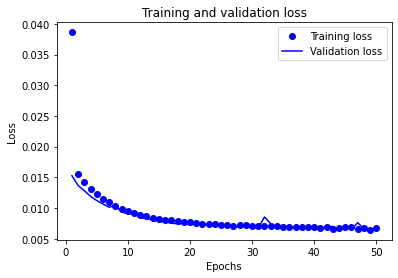

In [25]:
acc = history.history['mae']
val_acc = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

32/32 [==============================] - 0s 2ms/step - loss: 0.0062 - mae: 0.0595


In [27]:
model.save('time_prediction.h5')

In [32]:
predicted = model.predict([[0.6771, 0.6, 1, 0.76]])
predicted   

array([[0.5150707]], dtype=float32)